# Dimension Reduction

In [35]:
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA, SparsePCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In this notebook, I will dive into several commonly used dimension reduction techniques. I will implement on iris dataset which only contains numeric features. I will conduct experiments and comparisons based on sklearn built-in methods.

In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
color_mapping = {0: sns.xkcd_rgb['bright purple'], 1: sns.xkcd_rgb['lime'], 2: sns.xkcd_rgb['ochre']}
colors = list(map(lambda x: color_mapping[x], y))

## PCA

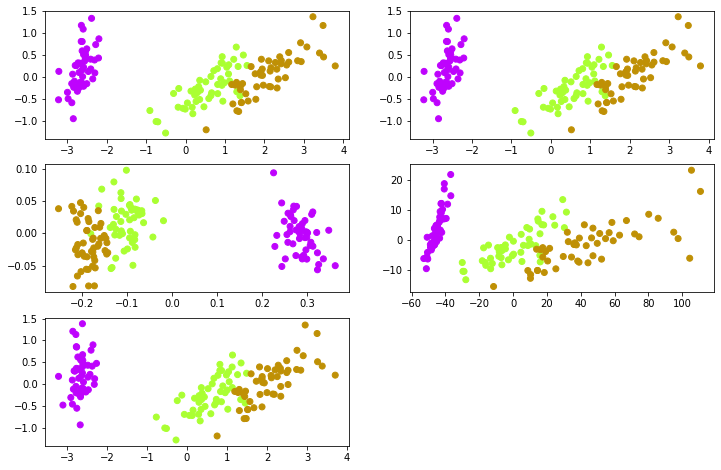

In [43]:
plt.figure(figsize=(12, 8))

model = PCA(n_components=2, random_state=0)
model = model.fit_transform(X)
plt.subplot(321)
plt.scatter(model[:, 0], model[:, 1], c=colors)

model = KernelPCA(n_components=2, random_state=0, n_jobs=-1, kernel='linear')
model = model.fit_transform(X)
plt.subplot(322)
plt.scatter(model[:, 0], model[:, 1], c=colors)

model = KernelPCA(n_components=2, random_state=0, n_jobs=-1, kernel='cosine')
model = model.fit_transform(X)
plt.subplot(323)
plt.scatter(model[:, 0], model[:, 1], c=colors)

model = KernelPCA(n_components=2, random_state=0, n_jobs=-1, kernel='poly')
model = model.fit_transform(X)
plt.subplot(324)
plt.scatter(model[:, 0], model[:, 1], c=colors)

model = SparsePCA(n_components=2, random_state=0, n_jobs=-1)
model = model.fit_transform(X)
plt.subplot(325)
plt.scatter(model[:, 0], model[:, 1], c=colors)

plt.show()

PCA is linear dimension reduction technique and kernel PCA can be nonlinear. So, linear kernel PCA is just the normal PCA. For iris dataset, kernel PCA with poly/cosine kernel works well. The sparse PCA calculates in a different way, but also works well in iris dataset.

## t-SNE

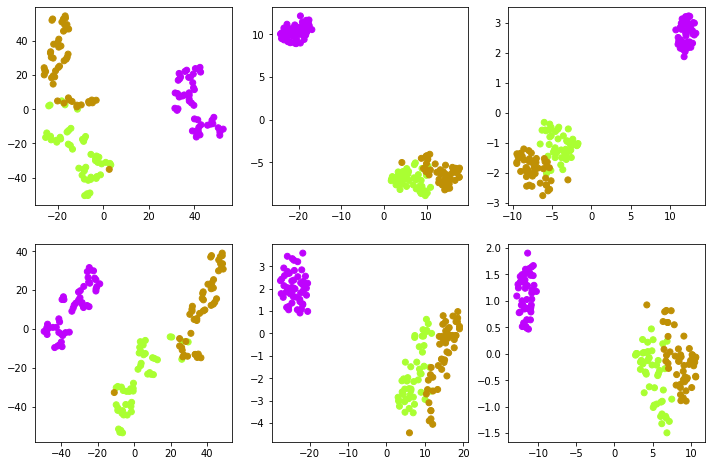

In [34]:
plt.figure(figsize=(12, 8))

for (perp, sub_id) in [(5, 231), (30, 232), (50, 233)]:
    model = TSNE(learning_rate='auto', init='random', n_jobs=-1, random_state=0, perplexity=perp)
    model = model.fit_transform(X)
    plt.subplot(sub_id)
    plt.scatter(model[:, 0], model[:, 1], c=colors)
    model = TSNE(learning_rate='auto', init='pca', n_jobs=-1, random_state=0, perplexity=perp)
    model = model.fit_transform(X)
    plt.subplot(sub_id+3)
    plt.scatter(model[:, 0], model[:, 1], c=colors)

plt.show()

We can see that t-SNE does help to visual different clusters from high dimension easily, if with right hyperparameters. 

The top three plots are using random initialization of embedding and the lower three plots are using pca as initialization of embedding. We can see initialization with pca results in better stability than random initialization.

As pointed out many times, the perplexity of t-SNE does large influence on the result of visualization. In a small dataset like iris, 5 is enough to distinguish between classes and 30 or 50 are too many.

Advantages compared to PCA:
- t-SNE is non-linear dimention reduction technique.
- has better performance
- can handle outliers
- randomised algorithm